In [6]:
from ultralytics import YOLO
import torch

model = YOLO('yolo11m.pt')

print(model)

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(192, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(256, eps=0.001, momentum=0.03, affine=True, track_


image 1/1 /Users/seungwoo/Workspace/SatellieteIMGDetection/image256.png: 640x640 (no detections), 181.6ms
Speed: 1.6ms preprocess, 181.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


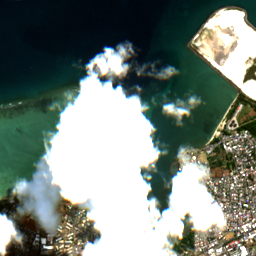

In [5]:
result = model('image256.png')
# YOLO 결과에서 각 객체에 대해 특징을 추출 (예시로 모델 중간 출력을 이용할 수 있음)
features = result[0].boxes  # YOLO 결과에서 박스 정보 등
# 결과 표시
result[0].show()

In [6]:
import torch
import torch.nn as nn
from ultralytics import YOLO

# 각도 예측 모듈 정의
class AnglePredictor(nn.Module):
    def __init__(self):
        super(AnglePredictor, self).__init__()
        # 간단한 회귀 모델로 각도 예측 (Conv2d 레이어 구성 예시)
        self.fc = nn.Sequential(
            nn.Linear(1024, 256),
            nn.ReLU(),
            nn.Linear(256, 1)  # 각도를 예측하는 1개 출력
        )

    def forward(self, x):
        return self.fc(x)

# YOLO 모델 로드
model = YOLO("yolov10m.pt")

# 각도 예측 모듈 로드
angle_predictor = AnglePredictor()

# 이미지에 대한 객체 감지
results = model("train/img/OBJ03271_PS3_K3_NIA0132.png")

# YOLO 결과에서 각 객체에 대해 특징을 추출 (예시로 모델 중간 출력을 이용할 수 있음)
features = results[0].boxes  # YOLO 결과에서 박스 정보 등

# 각도 예측 (박스 특징을 기반으로 각도를 예측할 수 있음, 예시는 임의의 입력 사용)
for feature in features:
    # 각도를 예측하는 모델에 해당 특징을 전달 (이 부분은 실제로 사용할 특징으로 수정)
    angle = angle_predictor(torch.randn(1024))  # 예시로 랜덤 벡터 사용, 실제론 feature 이용
    print(f"Predicted angle: {angle.item()}")

# 결과 표시
results[0].show()



image 1/1 e:\Workspace\SatellieteIMGDetection\train\img\OBJ03271_PS3_K3_NIA0132.png: 640x640 (no detections), 46.8ms
Speed: 3.0ms preprocess, 46.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
